## Analysis of top 50 transfers in football history

This is a simple project built solely for practicing what I have learnt so far.
* **Libraries:** pandas,seaborn, matplotlib, streamlit(for web app)
* **Data source:** [wikipedia](https://en.wikipedia.org/wiki/List_of_most_expensive_association_football_transfers)

We use `pd.read_html()` for web scraping. In the first cell, we find the total no of tables in the webpage. In the second cell, we use the `match` parameter to get the desired table.

In [1]:
import pandas as pd

tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_most_expensive_association_football_transfers')
print(f'Total tables:{len(tables)}')

Total tables:8


In [2]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_most_expensive_association_football_transfers', match='Top 50 most expensive association football transfers')
print(f'Total tables:{len(tables)}')

Total tables:1


In [3]:
df = tables[0]
df.head()

,Rank,Player,From,To,Position,Fee(€ mln),Fee(£ mln),Year,Ref.
0,1,Neymar,Barcelona,Paris Saint-Germain,Forward,€222[a],£198,2017,[3][4]
1,2,Kylian Mbappé,Monaco,Paris Saint-Germain,Forward,€180,£163,2018[b],[5]
2,3,Philippe Coutinho,Liverpool,Barcelona,Midfielder,€145,£105[c],2018,[6]
3,4,João Félix,Benfica,Atlético Madrid,Forward,€126,£112.9,2019,[7]
4,5,Antoine Griezmann,Atlético Madrid,Barcelona,Forward,€120[a],£107,2019,[8]


## Data cleaning
Before beginning analysis phase, we need to clean the data first. In the table output above, we can see some unformatted data. This needs to be brought to a standardized format

In [4]:
df.drop(['Fee(£ mln)','Ref.'], inplace=True, axis=1)
df.head()

,Rank,Player,From,To,Position,Fee(€ mln),Year
0,1,Neymar,Barcelona,Paris Saint-Germain,Forward,€222[a],2017
1,2,Kylian Mbappé,Monaco,Paris Saint-Germain,Forward,€180,2018[b]
2,3,Philippe Coutinho,Liverpool,Barcelona,Midfielder,€145,2018
3,4,João Félix,Benfica,Atlético Madrid,Forward,€126,2019
4,5,Antoine Griezmann,Atlético Madrid,Barcelona,Forward,€120[a],2019


`df.info()` command displays the datatype of each column. Below, we can see every attribute has data type object. We need to change the data type of the numerical attributes to perform analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        51 non-null     int64 
 1   Player      51 non-null     object
 2   From        51 non-null     object
 3   To          51 non-null     object
 4   Position    51 non-null     object
 5   Fee(€ mln)  51 non-null     object
 6   Year        51 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.9+ KB


## Breakdown of the command below:
* `.astype('str')`

First, we need to make sure that the entire column is a string in order to apply regex
*  `.str.extractall('(\d+)')`

Using extract all, we can return every number from the string. The (\d)+ will look for any digit or any length in the string.The result ends up being a longer DataFrame where every match becomes its own row in a multi-index DataFrame.

* `.unstack()`

This brings the matched numbers into the same row as the original string. Each grouping will be in a separate column.

* `.fillna('')`

Since certain strings may have more matched groups than others, there may be NaN values in your DataFrame. This step removes them because otherwise, any operation that involves a NaN value results in NaN value.

* `.sum(axis=1)`

Finally, to bring all the numbers together into one cell, we can run a sum. The axis=1 argument will sum the row values. The groupings are each stored as a string so it doesn’t add the numbers but will concatenate the numbers. The resulting column will be stored as a float data type.

* `.astype(int)`

This last step is optional if you don’t want your number to be a float.



In [6]:
df['Transfer year'] = df['Year'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [31]:
df['Fee in €(mln)'] = df['Fee(€ mln)'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [33]:
df

,Rank,Player,From,To,Position,Fee(€ mln),Year,Transfer year,Fee in €(mln)
0,1,Neymar,Barcelona,Paris Saint-Germain,Forward,€222[a],2017,2017,222
1,2,Kylian Mbappé,Monaco,Paris Saint-Germain,Forward,€180,2018[b],2018,180
2,3,Philippe Coutinho,Liverpool,Barcelona,Midfielder,€145,2018,2018,145
3,4,João Félix,Benfica,Atlético Madrid,Forward,€126,2019,2019,126
4,5,Antoine Griezmann,Atlético Madrid,Barcelona,Forward,€120[a],2019,2019,120
5,6,Jack Grealish,Aston Villa,Manchester City,Forward,€117,2021,2021,117
6,7,Romelu Lukaku,Inter Milan,Chelsea,Forward,€115,2021,2021,115
7,8,Ousmane Dembélé,Borussia Dortmund,Barcelona,Forward,€105[d],2017,2017,105
8,8,Paul Pogba,Juventus,Manchester United,Midfielder,€105[e],2016,2016,105
9,10,Eden Hazard,Chelsea,Real Madrid,Forward,€100,2019,2019,100


In [36]:
df['Fee in €(mln)'] = df['Fee in €(mln)'].astype('float')

In [37]:
df

,Rank,Player,From,To,Position,Fee(€ mln),Year,Transfer year,Fee in €(mln)
0,1,Neymar,Barcelona,Paris Saint-Germain,Forward,€222[a],2017,2017,222.0
1,2,Kylian Mbappé,Monaco,Paris Saint-Germain,Forward,€180,2018[b],2018,180.0
2,3,Philippe Coutinho,Liverpool,Barcelona,Midfielder,€145,2018,2018,145.0
3,4,João Félix,Benfica,Atlético Madrid,Forward,€126,2019,2019,126.0
4,5,Antoine Griezmann,Atlético Madrid,Barcelona,Forward,€120[a],2019,2019,120.0
5,6,Jack Grealish,Aston Villa,Manchester City,Forward,€117,2021,2021,117.0
6,7,Romelu Lukaku,Inter Milan,Chelsea,Forward,€115,2021,2021,115.0
7,8,Ousmane Dembélé,Borussia Dortmund,Barcelona,Forward,€105[d],2017,2017,105.0
8,8,Paul Pogba,Juventus,Manchester United,Midfielder,€105[e],2016,2016,105.0
9,10,Eden Hazard,Chelsea,Real Madrid,Forward,€100,2019,2019,100.0


In [44]:
df["Fee in €(mln)"].replace(to_replace= 845.0, value = 84.50, inplace=True )

In [46]:
df["Fee in €(mln)"].replace(to_replace= 823.0, value = 82.30, inplace=True )

In [48]:
df["Fee in €(mln)"].replace(to_replace= 756.0, value = 75.60, inplace=True )

In [50]:
df["Fee in €(mln)"].replace(to_replace= 695.0, value = 69.50, inplace=True )
df["Fee in €(mln)"].replace(to_replace= 678.0, value = 67.80, inplace=True )
df["Fee in €(mln)"].replace(to_replace= 655.0, value = 65.50, inplace=True )
df["Fee in €(mln)"].replace(to_replace= 652.0, value = 65.20, inplace=True )
df["Fee in €(mln)"].replace(to_replace= 645.0, value = 64.50, inplace=True )
df["Fee in €(mln)"].replace(to_replace= 637.0, value = 63.70, inplace=True )
df["Fee in €(mln)"].replace(to_replace= 625.0, value = 62.50, inplace=True )
df["Fee in €(mln)"].replace(to_replace= 625.0, value = 62.50, inplace=True )

In [53]:
df.drop(['Fee(€ mln)','Year'], inplace=True,axis=1)

In [54]:
df

,Rank,Player,From,To,Position,Transfer year,Fee in €(mln)
0,1,Neymar,Barcelona,Paris Saint-Germain,Forward,2017,222.0
1,2,Kylian Mbappé,Monaco,Paris Saint-Germain,Forward,2018,180.0
2,3,Philippe Coutinho,Liverpool,Barcelona,Midfielder,2018,145.0
3,4,João Félix,Benfica,Atlético Madrid,Forward,2019,126.0
4,5,Antoine Griezmann,Atlético Madrid,Barcelona,Forward,2019,120.0
5,6,Jack Grealish,Aston Villa,Manchester City,Forward,2021,117.0
6,7,Romelu Lukaku,Inter Milan,Chelsea,Forward,2021,115.0
7,8,Ousmane Dembélé,Borussia Dortmund,Barcelona,Forward,2017,105.0
8,8,Paul Pogba,Juventus,Manchester United,Midfielder,2016,105.0
9,10,Eden Hazard,Chelsea,Real Madrid,Forward,2019,100.0


## Data cleaning completed

Now, if we run the `df.info()`command we can see integer, float and object(string) data types. Data cleaning is complete and we are ready to move on to analysis phase.



In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           51 non-null     int64  
 1   Player         51 non-null     object 
 2   From           51 non-null     object 
 3   To             51 non-null     object 
 4   Position       51 non-null     object 
 5   Transfer year  51 non-null     int64  
 6   Fee in €(mln)  51 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ KB


In [56]:
total = df['Fee in €(mln)'].sum()
print(total)

4434.599999999999


In [85]:
position = df.groupby(['Position'])['Fee in €(mln)'].sum()
print(position)

Position
Defender       604.7
Forward       2528.4
Goalkeeper     142.5
Midfielder    1159.0
Name: Fee in €(mln), dtype: float64


## Data visualization

Using seaborn and matplotlib, we use pie charts and bar charts in different orientations to visualize the data.
Visualization helps to express our ideas clearly to others as well as making it appealing.

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


From
Roma                  62.5
Milan                 67.0
Fiorentina            70.0
VfL Wolfsburg         75.0
Bayer Leverkusen      84.0
Southampton           84.5
Everton               85.0
Chelsea              100.0
Tottenham Hotspur    100.0
Aston Villa          117.0
Athletic Bilbao      145.2
Lille                150.0
Ajax                 150.0
Napoli               154.5
Leicester City       154.8
Inter Milan          184.5
Manchester United    238.0
Real Madrid          241.1
Benfica              269.0
Atlético Madrid      270.0
Liverpool            289.8
Barcelona            294.0
Borussia Dortmund    317.7
Juventus             326.0
Monaco               405.0
Name: Fee in €(mln), dtype: float64


<AxesSubplot:ylabel='From'>

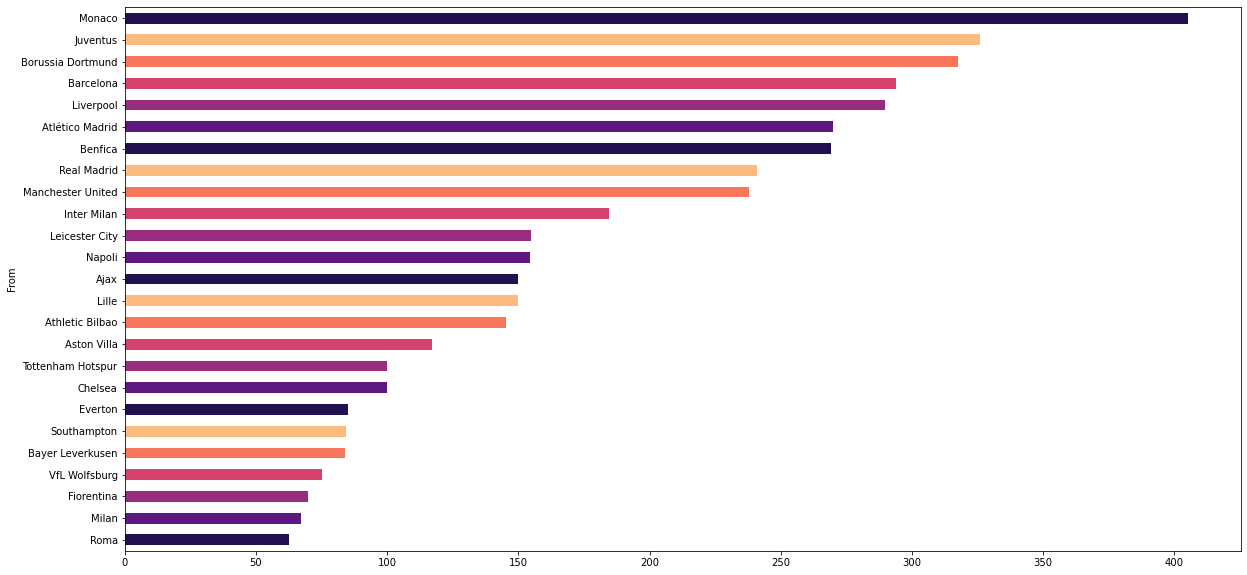

In [173]:
sellingCount = df.groupby(['From'])['Fee in €(mln)'].sum().sort_values(ascending=True)
print(sellingCount)
sellingCount.plot(kind = 'barh', figsize = (20,10), color = sns.color_palette("magma"))


To
Barcelona              596.8
Real Madrid            592.0
Manchester City        590.5
Paris Saint-Germain    530.5
Manchester United      437.6
Chelsea                408.5
Juventus               407.0
Liverpool              222.0
Atlético Madrid        196.0
Bayern Munich          160.0
Arsenal                143.7
Inter Milan             80.0
Napoli                  70.0
Name: Fee in €(mln), dtype: float64


<AxesSubplot:xlabel='To'>

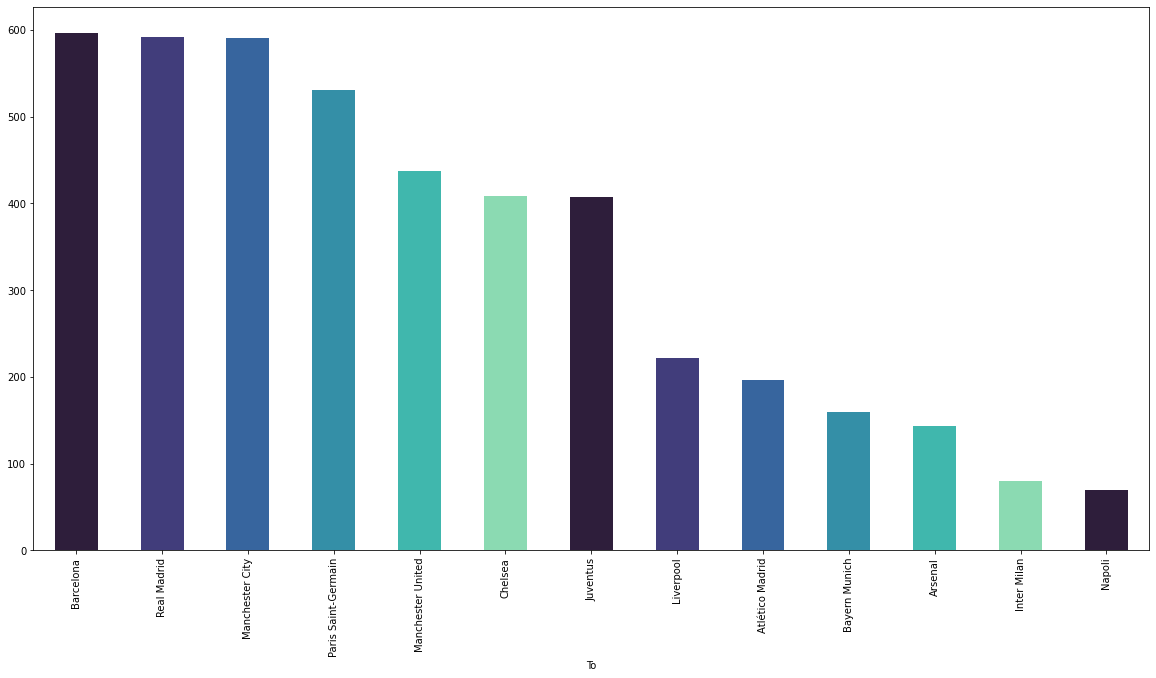

In [172]:
buyingCount = df.groupby(['To'])['Fee in €(mln)'].sum().sort_values(ascending=False)
print(buyingCount)
buyingCount.plot(kind = 'bar', figsize = (20,10), color = sns.color_palette("mako"))

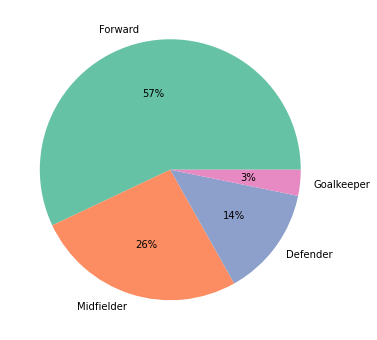

In [146]:
plt.figure(figsize = (6,6))
forward = (df.query("Position == 'Forward'")['Fee in €(mln)'].sum()/total)
midfielder = (df.query("Position == 'Midfielder'")['Fee in €(mln)'].sum()/total)
defender = (df.query("Position == 'Defender'")['Fee in €(mln)'].sum()/total)
gk = (df.query("Position == 'Goalkeeper'")['Fee in €(mln)'].sum()/total)
total = df['Fee in €(mln)'].sum()
data = [forward,midfielder,defender,gk]
labels = ['Forward','Midfielder','Defender', 'Goalkeeper']
color = sns.color_palette('Set2')
plt.pie(data, labels = labels,colors = color, autopct = '%.0f%%')
plt.show()

Transfer year
2001      76.0
2009     230.5
2013     164.5
2014     232.9
2015     201.5
2016     195.0
2017     477.5
2018     918.7
2019    1022.0
2020     294.0
2021     317.0
2022     305.0
Name: Fee in €(mln), dtype: float64


<AxesSubplot:ylabel='Transfer year'>

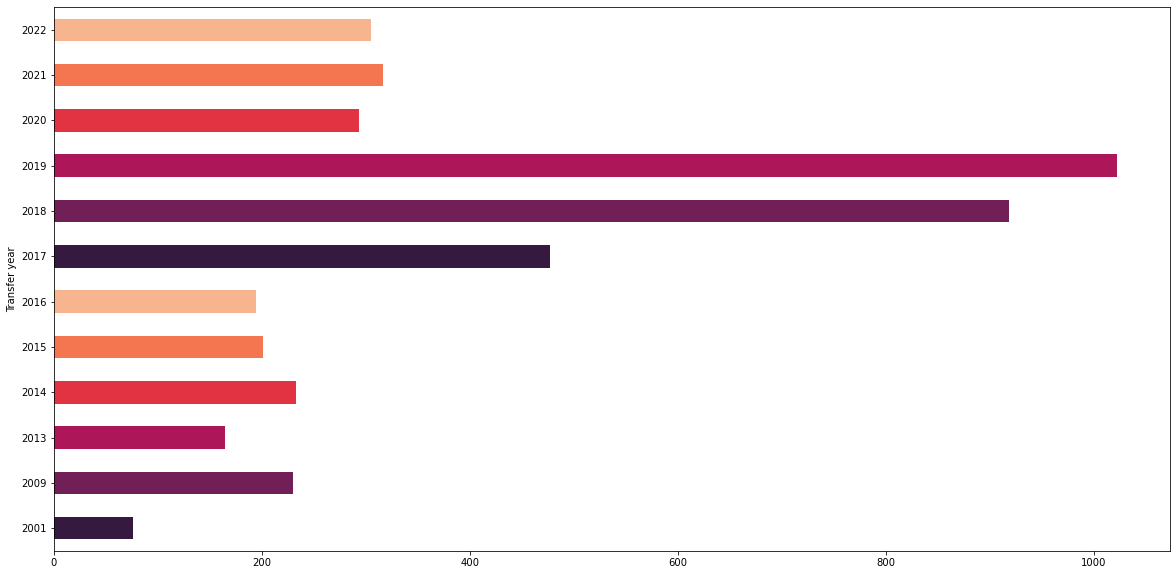

In [174]:
transferYear = df.groupby(['Transfer year'])['Fee in €(mln)'].sum()
print(transferYear)
transferYear.plot(kind = 'barh', figsize = (20,10), color = sns.color_palette("rocket"))


In [175]:
player = df.groupby(['Player'])['Fee in €(mln)'].sum().sort_values(ascending=False)
print(player)


Player
Romelu Lukaku                280.0
Neymar                       222.0
Cristiano Ronaldo            194.0
Kylian Mbappé                180.0
Matthijs de Ligt             155.0
Philippe Coutinho            145.0
Ángel Di María               139.6
João Félix                   126.0
Antoine Griezmann            120.0
Jack Grealish                117.0
Paul Pogba                   105.0
Ousmane Dembélé              105.0
Gareth Bale                  100.0
Eden Hazard                  100.0
Gonzalo Higuaín               90.0
Harry Maguire                 87.0
Jadon Sancho                  85.0
Virgil van Dijk               84.5
Kai Havertz                   84.0
Luis Suárez                   82.3
Aurélien Tchouaméni           80.0
Lucas Hernandez               80.0
Kepa Arrizabalaga             80.0
Nicolas Pépé                  80.0
Zinedine Zidane               76.0
Kevin De Bruyne               75.0
James Rodríguez               75.0
Frenkie de Jong               75.0
Darwin Núñez 